

# ArviZ Stancon 2020

Hablaremos de un proyecto que a nuestro parecer os interesará.


Si lees esta presentación interactiva, usa `espacio` para avanzar a la siguiente diapositiva.

# ArviZ y InferenceData


## Agenda
* Los muchos pasos del flujo de trabajo Bayesiano
* Dónde encaja ArviZ
* Dónde encaja InferenceData
* Cómo se integra con la comunidad
* Qué no funciona (aún)
* Dónde encajas tú

# La comunidad de ArviZ es internacional

Del mismo modo que el conjunto de la comunidad Bayesiana, los colaboradores de ArviZ provienen de muchos sitios. Gracias a ellos, esta presentación está disponible en muchos de los idiomas de nuestros colaboradores. No te las pierdas!

| Idioma      | Video         | Presentació |
| ------------- |:-------------:| ------:|
| English      | - |  [![badge](https://img.shields.io/badge/launch-English%20slides-579ACA.svg?logo=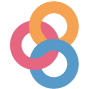)](https://mybinder.org/v2/gh/arviz-devs/arviz_sandbox/master?urlpath=git-pull%3Frepo%3Dhttps%253A%252F%252Fgithub.com%252Farviz-devs%252Farviz_misc%26urlpath%3Dtree%252Farviz_misc%252Fstancon_2020%252FInferenceData_Stancon2020_en.ipynb%26branch%3Dmaster) |
| Català      | - | [![badge](https://img.shields.io/badge/iniciar-presentaci%C3%B3%20en%20catal%C3%A0-579ACA.svg?logo=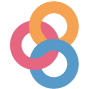)](https://mybinder.org/v2/gh/arviz-devs/arviz_sandbox/master?urlpath=git-pull%3Frepo%3Dhttps%253A%252F%252Fgithub.com%252Farviz-devs%252Farviz_misc%26urlpath%3Dtree%252Farviz_misc%252Fstancon_2020%252FInferenceData_Stancon2020_cat.ipynb%26branch%3Dmaster) |
| Français | -      | [![badge](https://img.shields.io/badge/lancer-pr%C3%A9sentation%20fran%C3%A7aise-579ACA.svg?logo=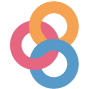)](https://mybinder.org/v2/gh/arviz-devs/arviz_sandbox/master?urlpath=git-pull%3Frepo%3Dhttps%253A%252F%252Fgithub.com%252Farviz-devs%252Farviz_misc%26urlpath%3Dtree%252Farviz_misc%252Fstancon_2020%252FInferenceData_Stancon2020_fr.ipynb%26branch%3Dmaster) |
| suomi | -      | [![badge](https://img.shields.io/badge/k%C3%A4ynnist%C3%A4-esitys%20suomeksi-579ACA.svg?logo=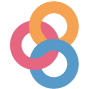)](https://mybinder.org/v2/gh/arviz-devs/arviz_sandbox/master?urlpath=git-pull%3Frepo%3Dhttps%253A%252F%252Fgithub.com%252Farviz-devs%252Farviz_misc%26urlpath%3Dtree%252Farviz_misc%252Fstancon_2020%252FInferenceData_Stancon2020_fi.ipynb%26branch%3Dmaster) |
| हिन्दी (Hindi) | -      |    - |

# Flujo de trabajo Bayesiano

Hay muchos pasos y los lenguajes de programación probabilistica (PPLs por las siglas en inglés) solo ayudan con algunos de ellos. ArviZ aspira a ajudar con el resto.

![Bayesian Workflow](img/Bayesian_workflow_Updated.png)

# Todas las cadenas de MCMC llevan al plot_rank
La elección de PPL puede depender de su sintaxi o de los algoritmos de mostreo, pero las cadenas, muestras, diagnosticos, visualización y los objetivos de modelaje son básicamente los mismos.

![PPLs](img/PPLS.png)

# Un mar de vectores
* Distribución predictiva a priori
* Distribución a posteriori
* Divergencias
* Probabilidades logarítmicas para diagnóstico
* ...y todo eso para cada parametro y para distintos tamaños

Los _Datafames_ con indexación integrada han demostrado ser útiles para el analísis de datos. Los datos Bayesianos son altamente dimensionales y comparten muchos de los desafíos.

# InferenceData es un camino
* Su especificación está disponible en: https://arviz-devs.github.io/arviz/schema/schema.html
* Cada grupo del netCDF almacena un vector distinto

![idata](https://arviz-devs.github.io/arviz/_images/InferenceDataStructure.png)


# Una ojeada al InferenceData
* Leer ficheros netCDF locales
* Generar un InferenceData a partir de PyStan

La integración des de Python con [CmdStanPy](https://arviz-devs.github.io/arviz/notebooks/InferenceDataCookbook.html#From-CmdStanPy), [CmdStan](https://arviz-devs.github.io/arviz/notebooks/InferenceDataCookbook.html#From-CmdStan) y des de Julia con [CmdStan.jl](https://arviz-devs.github.io/ArviZ.jl/stable/quickstart.html#Plotting-with-CmdStan.jl-outputs-1) también está implementada

## Leer ficheros netCDF locales

In [1]:
import arviz as az

# Aquí leemos un fichero .nc previamente almacenado online.
# Para leer un fichero local: az.from_netcdf("radon.nc")
idata = az.load_arviz_data("radon")
idata

Inference data with groups:
	> posterior
	> posterior_predictive
	> log_likelihood
	> sample_stats
	> prior
	> prior_predictive
	> observed_data
	> constant_data

In [2]:
az.style.use("arviz-darkgrid")
az.rcParams["stats.ic_pointwise"] = True

## Generar un InferenceData a partir de PyStan


In [3]:
# Inference Data ya es compatible con las interfaces de Stan (Thanks Ari, Allen and Mitzi!)
import pystan
from scipy import stats
y = stats.norm(10, 1).rvs(1000)
model = """
data {int N; real y[N];} parameters {real mu; real<lower=0> sigma;}
model { mu ~ normal(0, 1); sigma ~ cauchy(0, 1); y ~ normal(mu, sigma);}
"""
stan_model = pystan.StanModel(model_code=model, extra_compile_args=['-flto'])
fit = stan_model.sampling(data={"y":y, 'N':len(y)})

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_7068b6fd3880b0f3a68d15c5c43d21aa NOW.


In [4]:
idata_pystan = az.from_pystan(
    posterior=fit,
    observed_data=["y"],
)
idata_pystan

Inference data with groups:
	> posterior
	> sample_stats
	> observed_data

# Los datos estructurados facilitan el cálculo

## Exploración i diagnosis de la distribución a posteriori

<table style="color:#bbb">
  <tr>
    <th><span style="color:#000">posterior</span></th>
    <th><span style="color:#000">sample stats</span></th>
    <th>log likelihood</th>
    <th>posterior predictive</th>
    <th>observed data</th>
    <th>prior</th>
    <th>prior predictive</th>
  </tr>
</table>

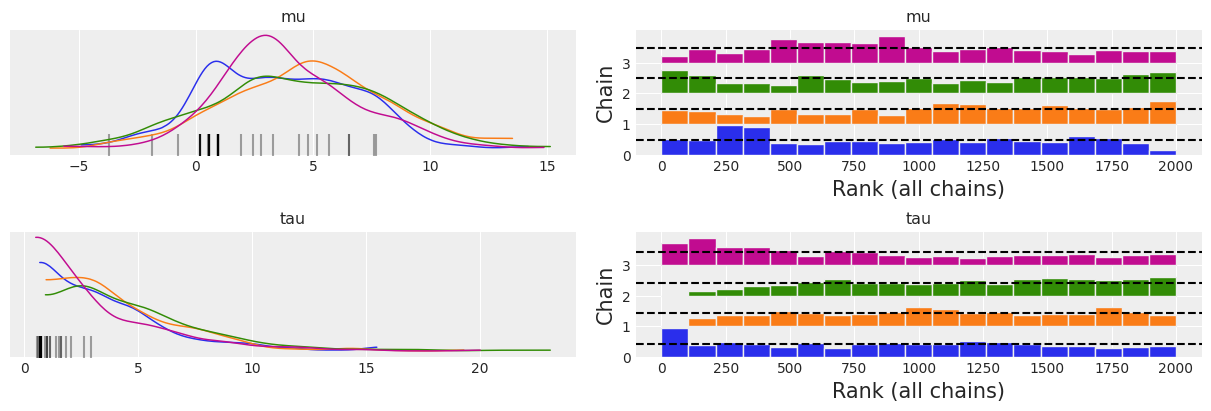

In [5]:
centered_eight = az.load_arviz_data("centered_eight")
az.plot_trace(centered_eight, var_names=["mu", "tau"], kind="rank_bars");

## Validación cruzada dejando un fora (PSIS)
_Leave one out cross validation_ en inglés

<table style="color:#bbb">
  <tr>
    <th>posterior</th>
    <th>sample stats</th>
    <th><span style="color:#000">log likelihood</span></th>
    <th>posterior predictive</th>
    <th>observed data</th>
    <th>prior</th>
    <th>prior predictive</th>
  </tr>
</table>

In [6]:
az.loo(idata)

Computed from 2000 by 919 log-likelihood matrix

         Estimate       SE
elpd_loo -1027.14    28.85
p_loo       26.78        -
------

Pareto k diagnostic values:
                         Count   Pct.
(-Inf, 0.5]   (good)      919  100.0%
 (0.5, 0.7]   (ok)          0    0.0%
   (0.7, 1]   (bad)         0    0.0%
   (1, Inf)   (very bad)    0    0.0%

## Verificación con la distribución predictiva a prior
_Prior predictive checks_ en inglés

<table style="color:#bbb">
  <tr>
    <th>posterior</th>
    <th>sample stats</th>
    <th>log likelihood</th>
    <th>posterior predictive</th>
    <th><span style="color:#000">observed data</span></th>
    <th>prior</th>
    <th><span style="color:#000">prior predictive</span></th>
  </tr>
</table>

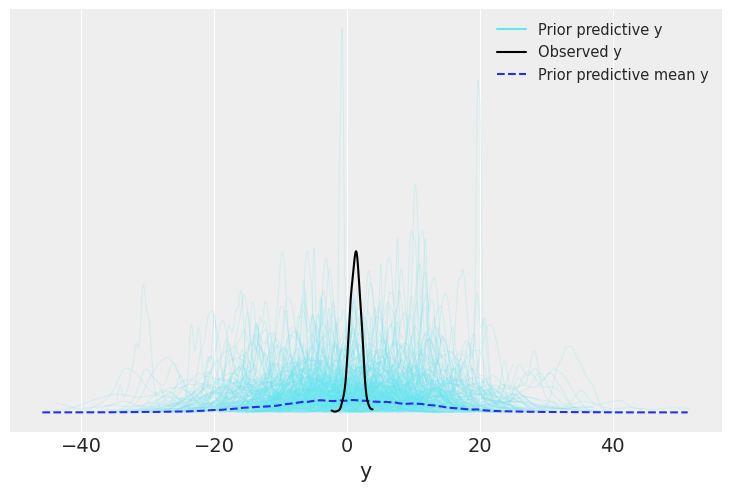

In [7]:
az.plot_ppc(idata, group="prior");

## Transformación integral de probabilidad dejando uno fuera
_Leave one out probability integral transform_ en inglès

<table style="color:#bbb">
  <tr>
    <th>posterior</th>
    <th>sample stats</th>
    <th><span style="color:#000">log likelihood</span></th>
    <th><span style="color:#000">posterior predictive</span></th>
    <th><span style="color:#000">observed data</span></th>
    <th>prior</th>
    <th>prior predictive</th>
  </tr>
</table>

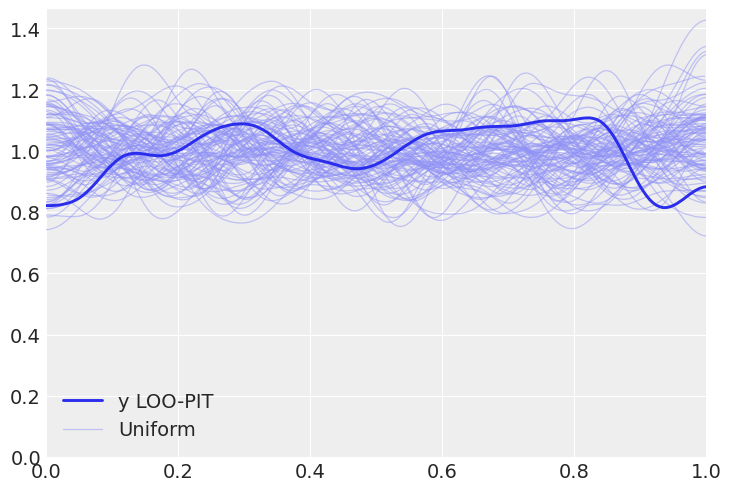

In [8]:
az.plot_loo_pit(idata, y="y");

# Beneficios de ArviZ e InferenceData
* Estructura de datos compatible con cualquier PPL o llenguaje de programación
* Formato de archivos netCDF, portable y persistente
* La facilidad al compartir datos fomenta la reproducibilidad
* Permite a los disñadores de PPL centrar-se en el PPL y no el en analisi y visualización de resultados.

# Limitaciones
* InferenceData es específico de MCMC
* No permite reproducir completamente el flujo de trabajo, solo parcialmente

# Añade InferenceData a tu llibreria
* InferenceData puede ser solo una estructura de datos. 
* No necessitas ArviZ ni Python 

![](img/ArviZ.R.png)

# Toda ayuda será bienvenida!
* Pulir [la especificación](https://arviz-devs.github.io/arviz/schema/schema.html) InferenceData
* Añadir más plots y diagnosticos
* Código, comentarios, críticas, compartir públicamente los modelos y plots que hayas generado
* Otras mejoras como por ejemplo para estructuras de datos dispersos

## Más información (enlaces en inglés)

* https://arviz-devs.github.io/arviz/
* https://arviz-devs.github.io/ArviZ.jl/stable/
* https://arviz-devs.github.io/arviz/notebooks/XarrayforArviZ.html
* https://arviz-devs.github.io/arviz/schema/schema.html